# Importing the essential libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

Using TensorFlow backend.
C:\Users\harma\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\harma\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\harma\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\harma\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

# Importing the data

In [2]:
loan = pd.read_csv('loan_data.csv')

# Exploring the data

In [3]:
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


#### We can observe the data contained within the dataframe

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


#### As you can see all the features are numeric except for purpose

In [5]:
loan.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


#### From the above computed data, we can observe many things like mean, median, standard deviation, minimum value and maximum value for all the numeric features

In [6]:
loan.shape

(9578, 14)

#### From the above we can see the data that we imported is having 9578 rows and 14 columns

In [7]:
loan.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [8]:
loan['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [9]:
loan['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

#### As you can see, we only have 7 unique value so we can convert them to numeric using label encoder

In [10]:
le = preprocessing.LabelEncoder()
loan['purpose'] = le.fit_transform(loan['purpose'])

# Exploring the changes in the data

In [11]:
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


#### We can observe that the purpose column has now been converted to numeric

In [12]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   int32  
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int32(1), int64(7)
memory usage: 1010.3 KB


#### We can observe that the purpose is converted to int32 from object

In [13]:
loan['purpose'].value_counts()

2    3957
0    2331
1    1262
4     629
6     619
5     437
3     343
Name: purpose, dtype: int64

In [14]:
loan['purpose'].unique()

array([2, 1, 0, 4, 6, 5, 3])

#### We can observe that after label encoding the purpose column, we have now converted string data to numeric

# Exploring the data visually

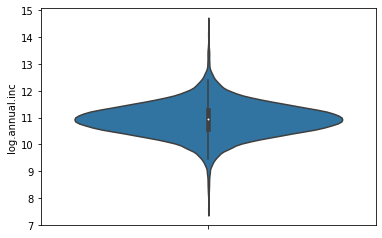

In [15]:
sns.violinplot(y = 'log.annual.inc', hue='not.fully.paid',data = loan)

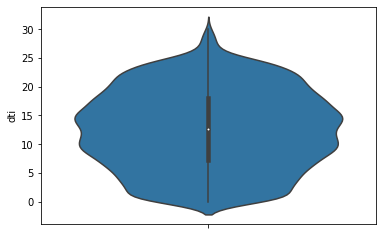

In [16]:
sns.violinplot(y='dti',hue='not.fully.paid',data = loan)

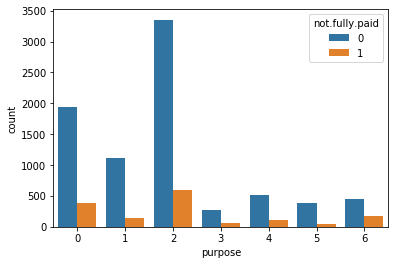

In [17]:
sns.countplot(x='purpose',hue='not.fully.paid',data = loan)

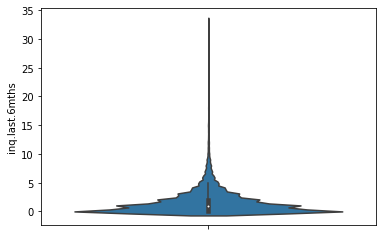

In [18]:
sns.violinplot(y='inq.last.6mths',hue='not.fully.paid',data = loan)

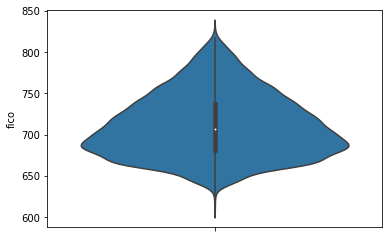

In [19]:
sns.violinplot(y='fico',hue='not.fully.paid',data = loan)

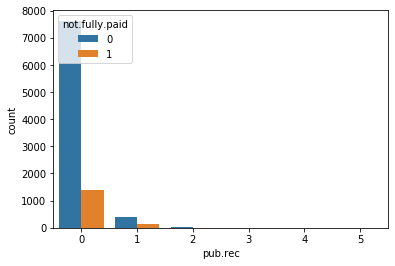

In [20]:
sns.countplot(x='pub.rec',hue='not.fully.paid',data = loan)

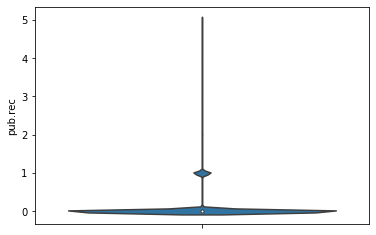

In [21]:
sns.violinplot(y='pub.rec',hue='not.fully.paid',data = loan)

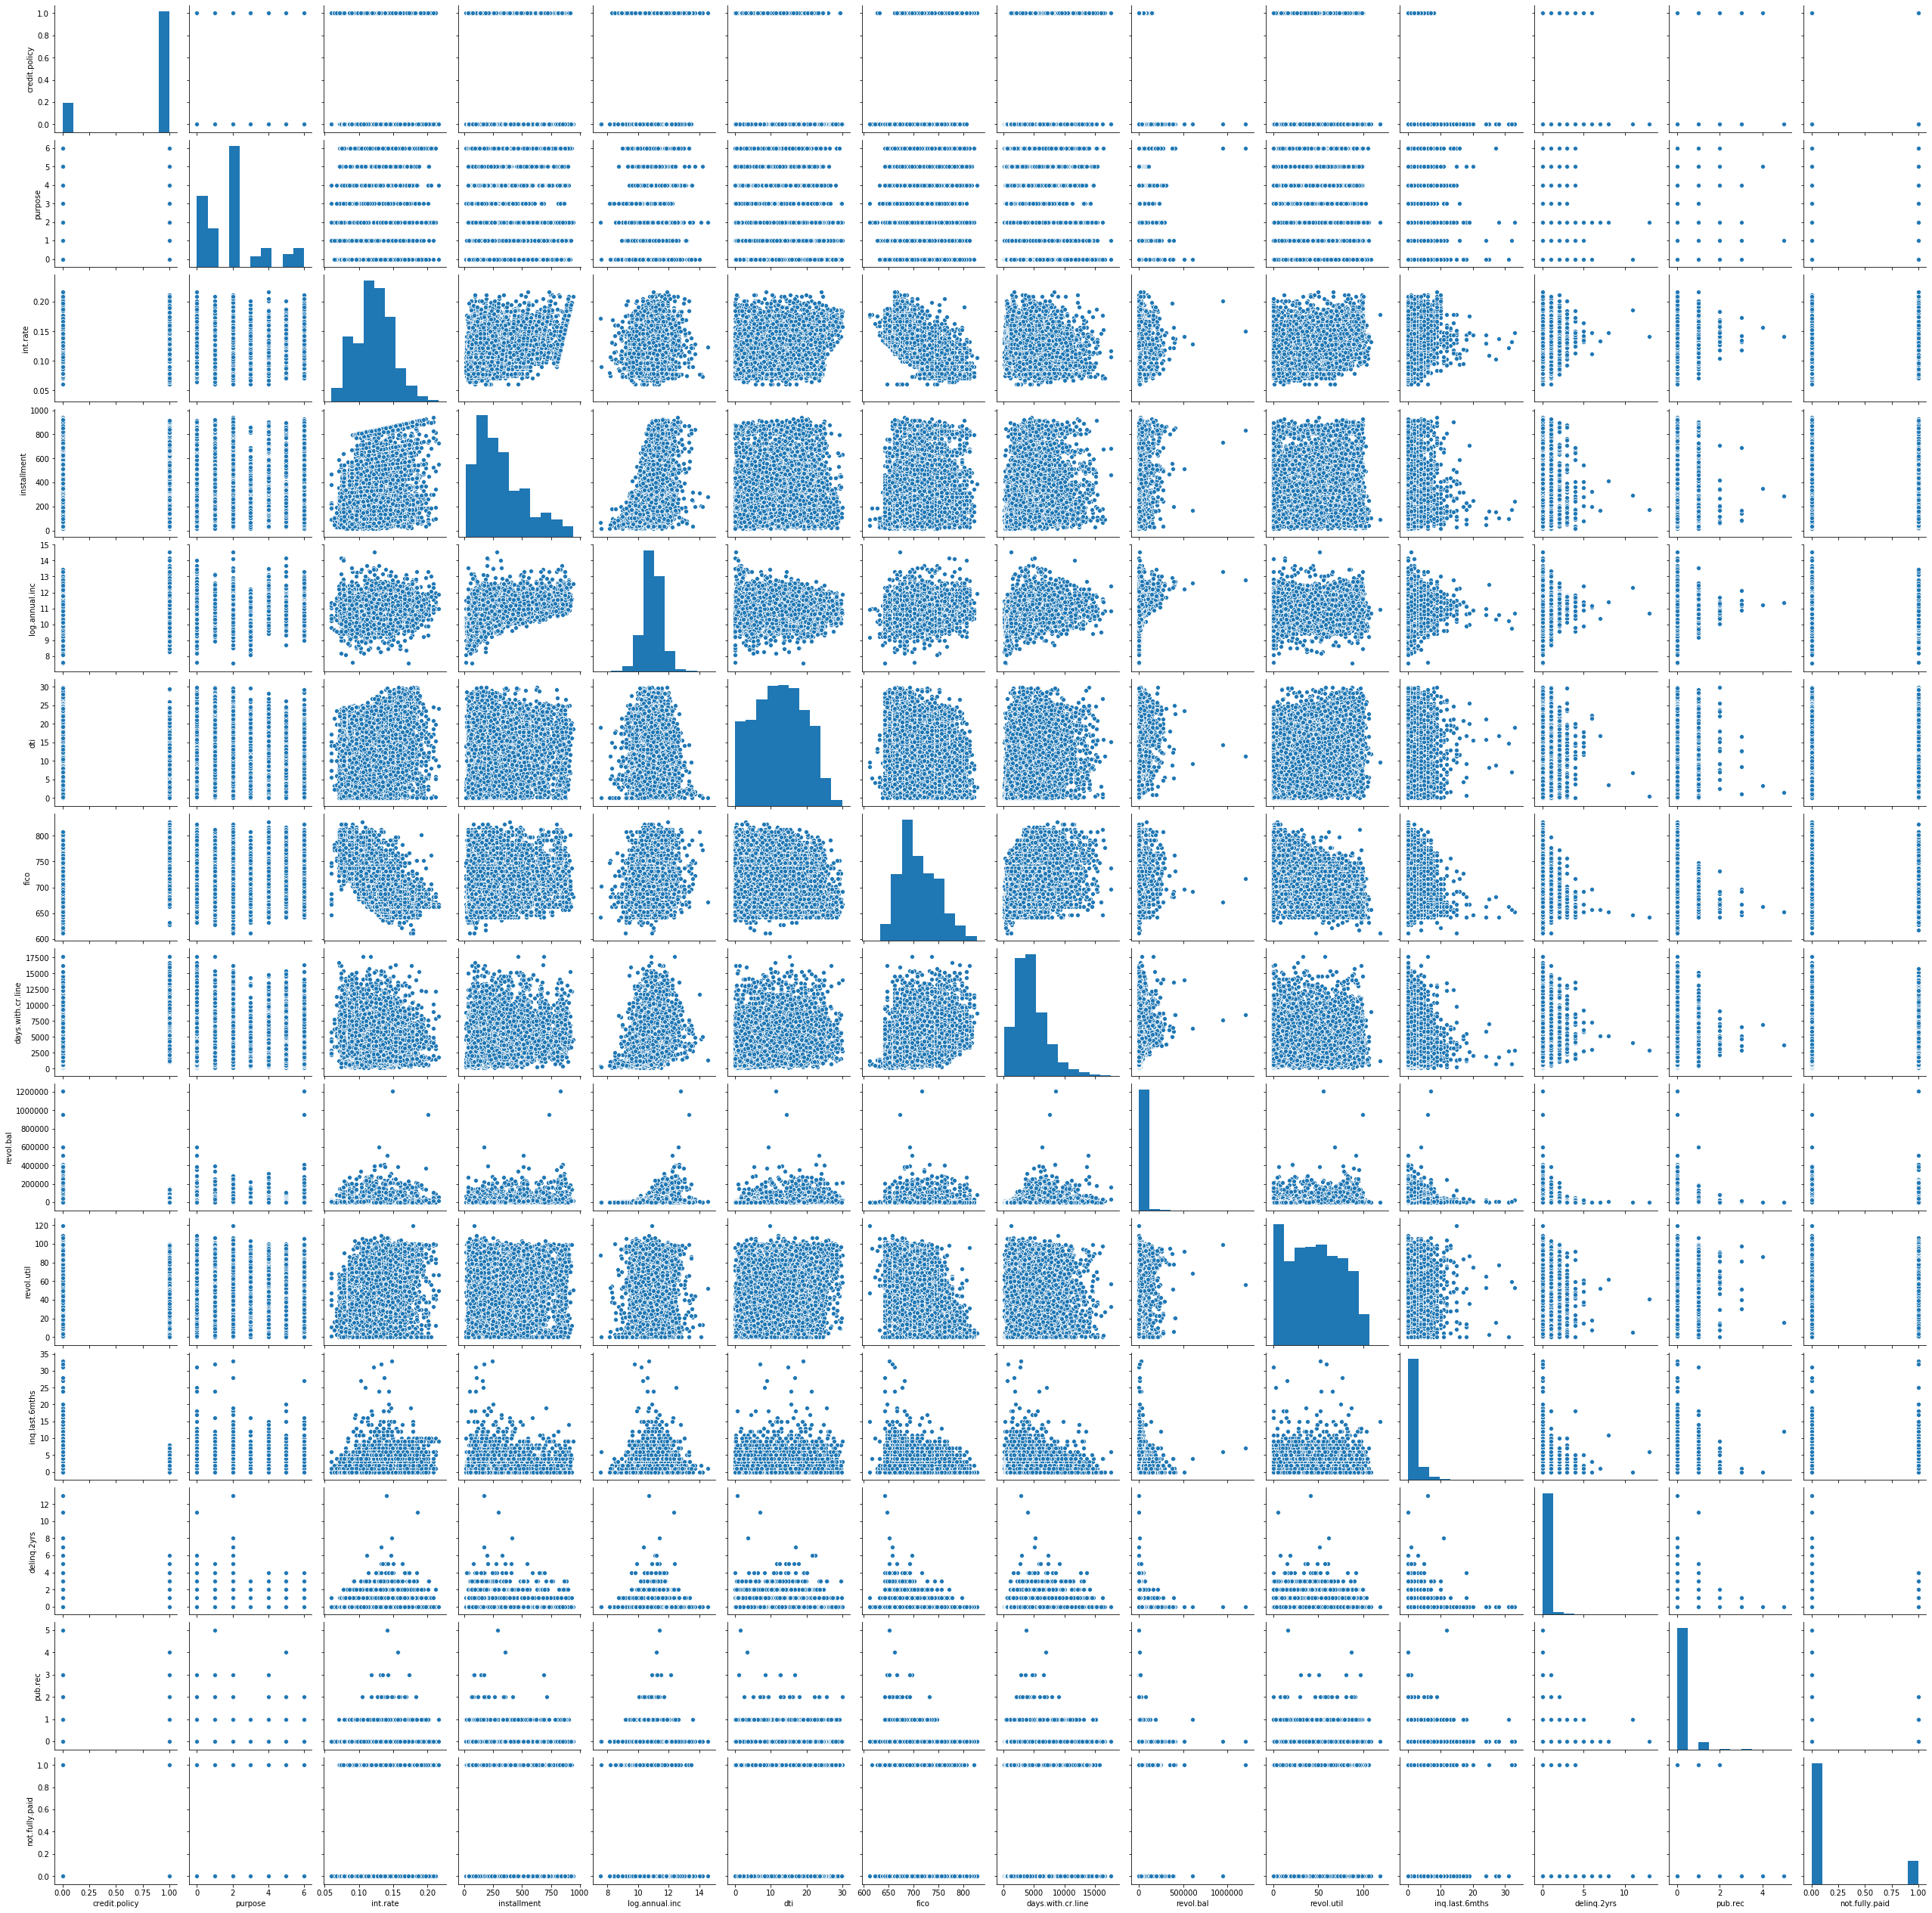

In [23]:
sns.pairplot(data = loan)

# Checking the correlations between features

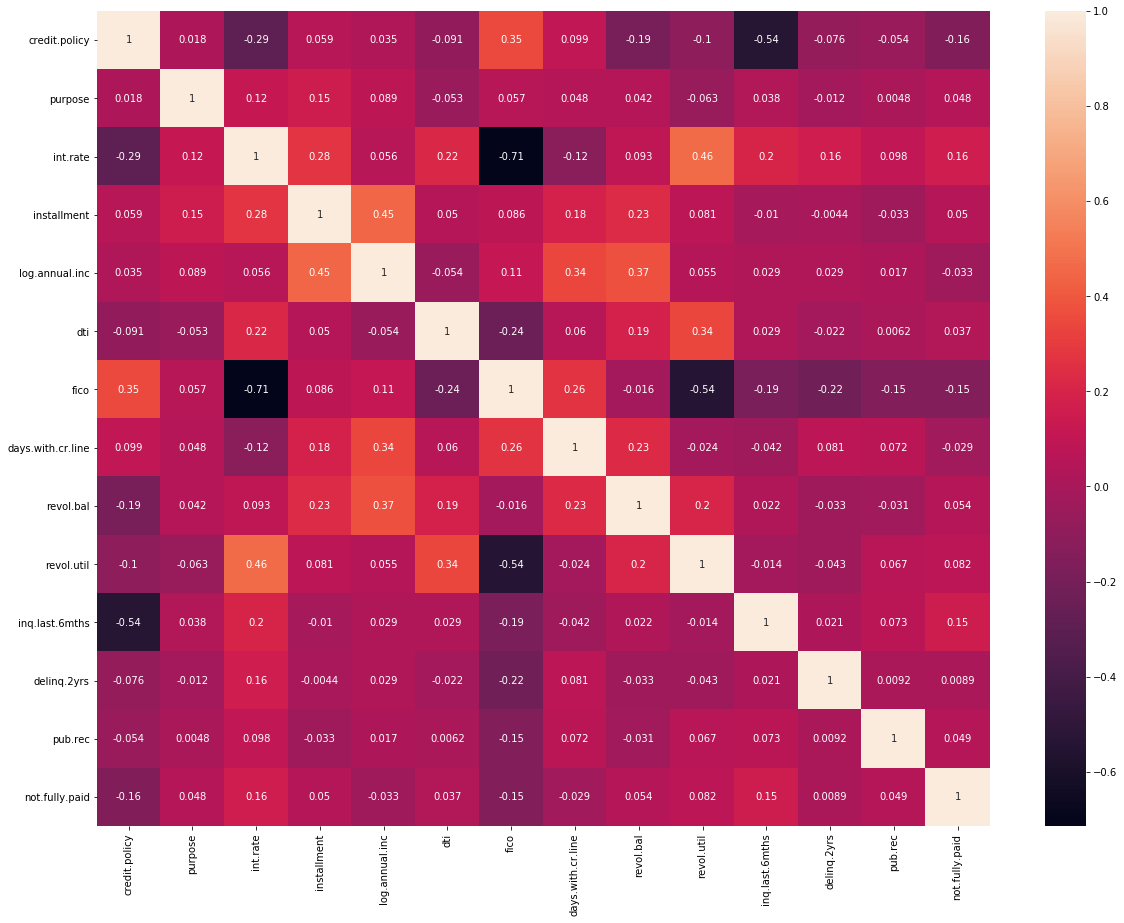

In [24]:
corrMatrix = loan.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corrMatrix, annot=True)

#### We can see many significant correlations from above heatmap

# Loading inputs and labels

In [25]:
input = pd.read_csv('input.csv')
input.shape

(9577, 18)

In [26]:
labels = pd.read_csv('output.csv')
labels.shape

(9577, 2)

# Splitting the data into training and testing data

In [27]:
x_train, x_test, y_train, y_test = train_test_split(input,labels,test_size = 0.25)

In [28]:
x_train.shape

(7182, 18)

In [29]:
y_train.shape

(7182, 2)

In [30]:
x_test.shape

(2395, 18)

In [31]:
y_test.shape

(2395, 2)

# Creating the model

In [32]:
model = Sequential()

model.add(Dense(12,input_dim=18,activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(2,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(x_train,y_train,epochs=200,batch_size=10)

scores = model.evaluate(x_test,y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/200
7182/7182 [==============================] - 1s 144us/step - loss: 61.7472 - accuracy: 0.8042
Epoch 2/200
7182/7182 [==============================] - 1s 103us/step - loss: 13.4713 - accuracy: 0.8608
Epoch 3/200
7182/7182 [==============================] - 1s 108us/step - loss: 16.0615 - accuracy: 0.8743
Epoch 4/200
7182/7182 [==============================] - 1s 103us/step - loss: 14.0060 - accuracy: 0.8761
Epoch 5/200
7182/7182 [==============================] - 1s 104us/step - loss: 8.5710 - accuracy: 0.8796
Epoch 6/200
7182/7182 [==============================] - 1s 92us/step - loss: 11.6795 - accuracy: 0.8768
Epoch 7/200
7182/7182 [==============================] - 1s 101us/step - loss: 8.4640 - accuracy: 0.8813
Epoch 8/200
7182/7182 [==============================] - 1s 156us/step - loss: 7.7313 - accuracy: 0.8800
Epoch 9/200
7182/7182 [==============================] - 1s 1

7182/7182 [==============================] - 1s 124us/step - loss: 0.2477 - accuracy: 0.9321
Epoch 74/200
7182/7182 [==============================] - 1s 125us/step - loss: 0.2477 - accuracy: 0.9321
Epoch 75/200
7182/7182 [==============================] - 1s 135us/step - loss: 0.2482 - accuracy: 0.9321
Epoch 76/200
7182/7182 [==============================] - 1s 110us/step - loss: 0.2479 - accuracy: 0.9321
Epoch 77/200
7182/7182 [==============================] - 1s 110us/step - loss: 0.2481 - accuracy: 0.9321
Epoch 78/200
7182/7182 [==============================] - 1s 122us/step - loss: 0.2478 - accuracy: 0.9321
Epoch 79/200
7182/7182 [==============================] - 1s 115us/step - loss: 0.2478 - accuracy: 0.9321
Epoch 80/200
7182/7182 [==============================] - 1s 114us/step - loss: 0.2480 - accuracy: 0.9321
Epoch 81/200
7182/7182 [==============================] - 1s 94us/step - loss: 0.2480 - accuracy: 0.9321
Epoch 82/200
7182/7182 [==============================] - 1s

7182/7182 [==============================] - 1s 97us/step - loss: 0.2462 - accuracy: 0.9321
Epoch 151/200
7182/7182 [==============================] - 1s 102us/step - loss: 0.2452 - accuracy: 0.9321
Epoch 152/200
7182/7182 [==============================] - 1s 92us/step - loss: 0.2449 - accuracy: 0.9321
Epoch 153/200
7182/7182 [==============================] - 1s 96us/step - loss: 0.2439 - accuracy: 0.9321
Epoch 154/200
7182/7182 [==============================] - 1s 117us/step - loss: 0.2401 - accuracy: 0.9321
Epoch 155/200
7182/7182 [==============================] - 1s 126us/step - loss: 0.2424 - accuracy: 0.9321
Epoch 156/200
7182/7182 [==============================] - 1s 137us/step - loss: 0.2394 - accuracy: 0.9321
Epoch 157/200
7182/7182 [==============================] - 1s 142us/step - loss: 0.2404 - accuracy: 0.9321
Epoch 158/200
7182/7182 [==============================] - 1s 119us/step - loss: 0.2438 - accuracy: 0.9321
Epoch 159/200
7182/7182 [=============================

In [36]:
predictions = model.predict(x_test)
y_rounded = [round(x[0]) for x in predictions]
scores_test = model.evaluate(x_test,y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores_test[1]*100))

2395/2395 [==============================] - 0s 14us/step

accuracy: 94.53%


#### We are running the above model for 200 iterations(epochs) and getting a accuracy of 94.53% on testing data